In [33]:
# Task A: Define Constants and Discretize the System

hbar = 1.0    # Reduced Planck constant, in amu
m = 1.0       # Mass of the particle, in amu
L = 1.0       # Width of the infinite potential well, in Bohr radii

N = 2000      # Size of real-space grid, in points 

In [35]:
# Task B: Construct the Laplacian Matrix

import numpy as np               # Imports the NumPy library

x = np.linspace(-L/2, L/2, N)    # x from -L/2 to L/2
dx = x[1] - x[0]                 # Space between adjacent points on discretized grid

def laplacian_matrix(N, dx):
  laplacian = (np.diag(-2 * np.ones(N)) +
               np.diag(np.ones(N - 1), k=1) +
               np.diag(np.ones(N - 1), k=-1)) / dx**2
  return laplacian

Laplacian = laplacian_matrix(N, dx)
print(Laplacian)                 # Prints Laplacian matrix

[[-7992001.99999936  3996000.99999968        0.         ...
         0.                0.                0.        ]
 [ 3996000.99999968 -7992001.99999936  3996000.99999968 ...
         0.                0.                0.        ]
 [       0.          3996000.99999968 -7992001.99999936 ...
         0.                0.                0.        ]
 ...
 [       0.                0.                0.         ...
  -7992001.99999936  3996000.99999968        0.        ]
 [       0.                0.                0.         ...
   3996000.99999968 -7992001.99999936  3996000.99999968]
 [       0.                0.                0.         ...
         0.          3996000.99999968 -7992001.99999936]]


In [36]:
# Task C: Construct the Hamiltonian Matrix
# The Hamiltonian is equal to the kinetic energy (T) and potential energy (V) of the system

V = np.zeros(N)     # Potential energy is zero inside of the well

T = -hbar**2 / (2 * m) * Laplacian   # Kinetic energy of the system

H = T + np.diag(V)

print(H)

[[ 3996000.99999968 -1998000.49999984        0.         ...
         0.                0.                0.        ]
 [-1998000.49999984  3996000.99999968 -1998000.49999984 ...
         0.                0.                0.        ]
 [       0.         -1998000.49999984  3996000.99999968 ...
         0.                0.                0.        ]
 ...
 [       0.                0.                0.         ...
   3996000.99999968 -1998000.49999984        0.        ]
 [       0.                0.                0.         ...
  -1998000.49999984  3996000.99999968 -1998000.49999984]
 [       0.                0.                0.         ...
         0.         -1998000.49999984  3996000.99999968]]


In [37]:
# Task D: Solve for Eigenvalues and Eigenfunctions

eigenvalues, eigenvectors = np.linalg.eig(H)

sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues = eigenvalues[sorted_indices]           # Sorts eigenvalues

num_levels = 7
number_of_eigenvalues = sorted_eigenvalues[:num_levels]

print("First seven energy levels (eigenvalues):")
print(number_of_eigenvalues)                               # Prints first seven eigenvalues                         

First seven energy levels (eigenvalues):
[  4.92494145  19.69975365  44.32440018  78.79882035 123.12292918
 177.29661742 241.31975152]


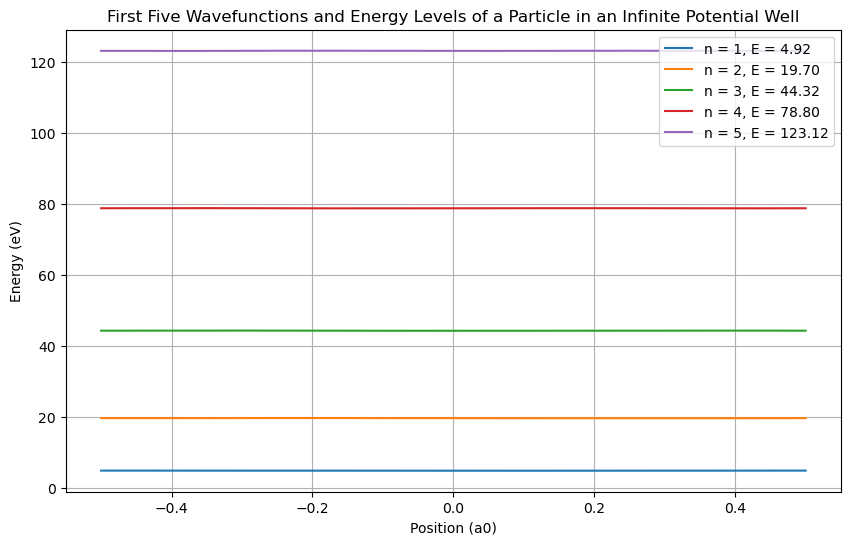

In [38]:
# Task E: Plot the Results

import matplotlib.pyplot as plt               # Imports the matplotlib library

num_wavefunctions_to_plot = 5                 # First five wavefunctions should be plotted

plt.figure(figsize = (10, 6))                 # Size of plot

for i in range(num_wavefunctions_to_plot):    # For each of the five wavefunctions, label with energy level
    psi = sorted_eigenvectors[:, i]

    plt.plot(x, psi + number_of_eigenvalues[i], label = f'n = {i+1}, E = {number_of_eigenvalues[i]:.2f}')

plt.xlabel('Position (a0)')                   # x-axis label
plt.ylabel('Energy (eV)')                     # y-axis label
plt.title('First Five Wavefunctions and Energy Levels of a Particle in an Infinite Potential Well')     # Title
plt.legend()                                  # Shows legend
plt.grid(True)                                # Shows gridlines
plt.show()                                    # Show plot